# pandas 进阶修炼 ｜早起Python
<br>

**本习题由公众号【早起Python & 可视化图鉴】 原创，转载及其他形式合作请与我们联系（微信号`sshs321`)，未经授权严禁搬运及二次创作，侵权必究！**



本习题基于 `pandas` 版本 `1.1.3`，所有内容应当在 `Jupyter Notebook` 中执行以获得最佳效果。

不同版本之间写法可能会有少许不同，如若碰到此情况，你应该学会如何自行检索解决。

# 4 - 数据统计描述性分析


<br>


在上一章完成基本的数据预览以及缺失值和重复值的处理后。

下一个步骤就是对数据进行简单的统计描述性分析，进一步观察数据特征。

本章就整理了部分常见操作进行练习。

## 初始化

<br>

该 `Notebook` 版本为**纯习题版**

如果需要答案或者提示，可以微信搜索公众号「早起Python」获取！

## 加载数据

In [33]:
import pandas as pd
df = pd.read_excel("2020年中国大学排名.xlsx",index_col="学校名称")
df

,排名,省市,学校类型,总分,办学层次得分,学科水平得分,办学资源得分,师资规模与结构得分,人才培养得分,科学研究得分,社会服务得分,高端人才得分,重大项目与成果得分,国际竞争力得分
学校名称,,,,,,,,,,,,,,
清华大学,1,北京,综合,852.5,38.2,72.4,39.6,48.4,256.8,69.1,40.6,76.5,131.0,79.9
北京大学,2,北京,综合,746.7,36.1,73.1,24.6,49.2,237.6,71.0,16.2,71.9,105.8,61.2
浙江大学,3,浙江,综合,649.2,33.9,65.3,20.1,48.3,215.3,68.6,23.9,49.1,81.7,43.0
上海交通大学,4,上海,综合,625.9,35.4,53.6,22.1,43.8,192.8,81.2,18.1,45.8,93.0,40.1
南京大学,5,江苏,综合,566.1,35.1,47.8,10.3,47.4,218.6,59.6,5.3,42.0,71.2,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
南京邮电大学,96,江苏,综合,213.9,25.0,12.5,2.4,34.8,101.2,12.4,6.5,1.6,4.6,13.0
河南大学,97,河南,综合,212.9,24.2,22.7,3.4,32.5,97.5,15.7,2.1,1.3,4.2,9.2
上海师范大学,98,上海,师范,212.8,27.3,17.9,3.6,32.1,96.9,14.0,0.5,2.0,6.8,11.8


## 数据探索

### 1 - 查看数据

<br>

查看数据前 10 行

### 2 - 修改索引

<br>

数据已经按照降序排列，让 学校 当索引会更好一点

-> 修改索引为 学校名称 列

### 3 - 查看数据量

也就是数据框的 行 * 列，总共单元格的数量

In [5]:
df.size
df.shape

1400

(100, 14)

### 4 - 数据排序

<br>

将数据按照总分升序排列，并展示前20个学校

备注：也就是看倒数20名啦

In [6]:
df.sort_values(by='总分',ascending=True)

,排名,省市,学校类型,总分,办学层次得分,学科水平得分,办学资源得分,师资规模与结构得分,人才培养得分,科学研究得分,社会服务得分,高端人才得分,重大项目与成果得分,国际竞争力得分
学校名称,,,,,,,,,,,,,,
广州大学,100,广东,综合,211.1,23.2,16.4,5.0,33.7,95.9,14.4,0.6,2.0,5.2,14.8
杭州电子科技大学,99,浙江,理工,211.6,25.4,12.6,2.7,36.5,103.4,12.0,2.5,1.5,2.6,12.3
上海师范大学,98,上海,师范,212.8,27.3,17.9,3.6,32.1,96.9,14.0,0.5,2.0,6.8,11.8
河南大学,97,河南,综合,212.9,24.2,22.7,3.4,32.5,97.5,15.7,2.1,1.3,4.2,9.2
南京邮电大学,96,江苏,综合,213.9,25.0,12.5,2.4,34.8,101.2,12.4,6.5,1.6,4.6,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
南京大学,5,江苏,综合,566.1,35.1,47.8,10.3,47.4,218.6,59.6,5.3,42.0,71.2,29.0
上海交通大学,4,上海,综合,625.9,35.4,53.6,22.1,43.8,192.8,81.2,18.1,45.8,93.0,40.1
浙江大学,3,浙江,综合,649.2,33.9,65.3,20.1,48.3,215.3,68.6,23.9,49.1,81.7,43.0


### 5 - 数据排序

将数据按照 高端人才得分 降序排序，展示前 10 位

In [10]:
df.nlargest(20,['高端人才得分','总分']) 
# DataFrame.nlargest(n, columns, keep='first') 
# columns= label or list of labels
# {‘first’, ‘last’, ‘all’}, default ‘first’: When using keep='all', all duplicate items are maintained:

,排名,省市,学校类型,总分,办学层次得分,学科水平得分,办学资源得分,师资规模与结构得分,人才培养得分,科学研究得分,社会服务得分,高端人才得分,重大项目与成果得分,国际竞争力得分
学校名称,,,,,,,,,,,,,,
清华大学,1,北京,综合,852.5,38.2,72.4,39.6,48.4,256.8,69.1,40.6,76.5,131.0,79.9
北京大学,2,北京,综合,746.7,36.1,73.1,24.6,49.2,237.6,71.0,16.2,71.9,105.8,61.2
中国科学技术大学,7,安徽,理工,526.4,40.0,39.1,10.6,45.9,191.5,52.6,0.2,55.1,49.2,42.2
浙江大学,3,浙江,综合,649.2,33.9,65.3,20.1,48.3,215.3,68.6,23.9,49.1,81.7,43.0
上海交通大学,4,上海,综合,625.9,35.4,53.6,22.1,43.8,192.8,81.2,18.1,45.8,93.0,40.1
复旦大学,6,上海,综合,556.7,36.6,48.4,14.9,46.3,198.5,65.7,6.5,42.9,62.0,34.8
南京大学,5,江苏,综合,566.1,35.1,47.8,10.3,47.4,218.6,59.6,5.3,42.0,71.2,29.0
南方科技大学,46,广东,综合,289.0,26.7,7.1,16.9,41.9,105.0,26.4,1.0,38.9,7.1,18.0
中山大学,10,广东,综合,457.2,30.3,47.1,13.7,46.8,154.4,65.9,5.6,27.1,33.8,32.6


### 6 - 分列排名

<br>

查看各项得分最高的学校名称

In [34]:
# 这个厉害了！！
df.iloc[:,3:].idxmax()

总分               清华大学
办学层次得分       中国科学技术大学
学科水平得分           北京大学
办学资源得分           清华大学
师资规模与结构得分        北京大学
人才培养得分           清华大学
科学研究得分         上海交通大学
社会服务得分           清华大学
高端人才得分           清华大学
重大项目与成果得分        清华大学
国际竞争力得分          清华大学
dtype: object

查看各项得分前三名的学校名称

In [90]:
# Get the top 3 values for each city
df = pd.read_excel("2020年中国大学排名.xlsx",index_col="学校名称")
top=df.unstack().groupby(level=0).apply(lambda df: df.sort_values(ascending=False)[0:2])
top.index = top.index.droplevel(0)
top

           学校名称    
人才培养得分     清华大学        256.8
           北京大学        237.6
办学层次得分     中国科学技术大学     40.0
           清华大学         38.2
办学资源得分     清华大学         39.6
           北京大学         24.6
国际竞争力得分    清华大学         79.9
           北京大学         61.2
学校类型       清华大学           综合
           深圳大学           综合
学科水平得分     北京大学         73.1
           清华大学         72.4
师资规模与结构得分  北京大学         49.2
           吉林大学         48.6
总分         清华大学        852.5
           北京大学        746.7
排名         广州大学          100
           杭州电子科技大学       99
省市         哈尔滨工程大学       黑龙江
           哈尔滨工业大学       黑龙江
社会服务得分     清华大学         40.6
           哈尔滨工业大学      40.2
科学研究得分     上海交通大学       81.2
           北京大学         71.0
重大项目与成果得分  清华大学        131.0
           北京大学        105.8
高端人才得分     清华大学         76.5
           北京大学         71.9
dtype: object

### 7 - 统计信息｜均值

计算总分列的均值

In [91]:
df.总分.mean()

322.50000000000017

### 8 - 统计信息｜中位数

<br>

计算总分列的中位数

In [92]:
df['总分'].median()

279.65

### 9 - 统计信息｜众数


计算总分列的众数

In [93]:
df.总分.mode()

0    233.4
dtype: float64

### 10 -统计信息｜部分

计算 总分、高端人才得分、办学层次得分的最大最小值、中位数、均值

In [94]:
df.agg({
        "总分": ["min", "max", "median", "mean"],
        "高端人才得分": ["min", "max", "median", "mean"],
        "办学层次得分":["min", "max", "median", "mean"]})

,总分,高端人才得分,办学层次得分
min,211.10,0.800,23.200
max,852.50,76.500,40.000
median,279.65,6.150,29.400
mean,322.50,11.176,29.692


### 11 - 统计信息｜完整

<br>

查看数值型数据的统计信息（均值、分位数等），并保留两位小数

In [95]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
排名,100.0,50.49,29.00,1.0,25.75,50.50,75.25,100.0
总分,100.0,322.50,118.36,211.1,244.18,279.65,378.80,852.5
办学层次得分,100.0,29.69,3.31,23.2,27.30,29.40,31.90,40.0
学科水平得分,100.0,27.49,12.42,6.8,19.65,24.00,33.92,73.1
办学资源得分,100.0,7.19,5.51,2.3,3.98,5.25,9.02,39.6
师资规模与结构得分,100.0,39.03,4.75,28.7,35.98,37.95,43.20,49.2
人才培养得分,100.0,134.41,33.82,91.8,109.08,122.80,154.75,256.8
科学研究得分,100.0,26.87,15.61,9.7,15.68,21.85,32.72,81.2
社会服务得分,100.0,7.47,7.99,0.0,2.20,5.20,9.80,40.6
高端人才得分,100.0,11.18,14.14,0.8,3.08,6.15,12.35,76.5


### 12 - 统计信息｜分组

计算各省市总分均值

In [100]:
df.groupby("省市")['总分'].mean().sort_values(ascending=False)

省市
天津     396.200000
黑龙江    364.800000
北京     362.827778
上海     350.510000
四川     349.266667
辽宁     339.550000
浙江     335.150000
湖北     335.085714
安徽     328.700000
吉林     326.000000
湖南     320.100000
福建     313.550000
山东     304.633333
甘肃     300.400000
江苏     298.386667
陕西     297.685714
重庆     289.200000
广东     286.011111
云南     234.100000
江西     228.400000
河南     223.900000
河北     216.700000
Name: 总分, dtype: float64

### 13 - 统计信息｜相关系数

<br>

也就是相关系数矩阵，也就是每两列之间的相关性系数

In [101]:
df.corr() 

,排名,总分,办学层次得分,学科水平得分,办学资源得分,师资规模与结构得分,人才培养得分,科学研究得分,社会服务得分,高端人才得分,重大项目与成果得分,国际竞争力得分
排名,1.000000,-0.852880,-0.818345,-0.807731,-0.633034,-0.885262,-0.885034,-0.843434,-0.514412,-0.697178,-0.732042,-0.694733
总分,-0.852880,1.000000,0.793589,0.934838,0.836351,0.829229,0.959664,0.942001,0.589710,0.921307,0.953615,0.917179
办学层次得分,-0.818345,0.793589,1.000000,0.703688,0.651787,0.755698,0.797602,0.711259,0.417265,0.704239,0.739157,0.667455
学科水平得分,-0.807731,0.934838,0.703688,1.000000,0.716097,0.778855,0.889084,0.929943,0.480871,0.793909,0.901262,0.829870
办学资源得分,-0.633034,0.836351,0.651787,0.716097,1.000000,0.697620,0.730003,0.747226,0.463466,0.861156,0.812887,0.850934
师资规模与结构得分,-0.885262,0.829229,0.755698,0.778855,0.697620,1.000000,0.833277,0.806259,0.425790,0.715772,0.710717,0.705235
人才培养得分,-0.885034,0.959664,0.797602,0.889084,0.730003,0.833277,1.000000,0.885429,0.571678,0.830452,0.873353,0.828115
科学研究得分,-0.843434,0.942001,0.711259,0.929943,0.747226,0.806259,0.885429,1.000000,0.475609,0.855328,0.882416,0.831071
社会服务得分,-0.514412,0.589710,0.417265,0.480871,0.463466,0.425790,0.571678,0.475609,1.000000,0.457190,0.500942,0.533772
高端人才得分,-0.697178,0.921307,0.704239,0.793909,0.861156,0.715772,0.830452,0.855328,0.457190,1.000000,0.902862,0.909247


### 14 - 相关系数｜热力图

<br>

将上一题的相关性系数矩阵制作为热力图

,排名,总分,办学层次得分,学科水平得分,办学资源得分,师资规模与结构得分,人才培养得分,科学研究得分,社会服务得分,高端人才得分,重大项目与成果得分,国际竞争力得分
排名,1.00,-0.85,-0.82,-0.81,-0.63,-0.89,-0.89,-0.84,-0.51,-0.70,-0.73,-0.69
总分,-0.85,1.00,0.79,0.93,0.84,0.83,0.96,0.94,0.59,0.92,0.95,0.92
办学层次得分,-0.82,0.79,1.00,0.70,0.65,0.76,0.80,0.71,0.42,0.70,0.74,0.67
学科水平得分,-0.81,0.93,0.70,1.00,0.72,0.78,0.89,0.93,0.48,0.79,0.90,0.83
办学资源得分,-0.63,0.84,0.65,0.72,1.00,0.70,0.73,0.75,0.46,0.86,0.81,0.85
师资规模与结构得分,-0.89,0.83,0.76,0.78,0.70,1.00,0.83,0.81,0.43,0.72,0.71,0.71
人才培养得分,-0.89,0.96,0.80,0.89,0.73,0.83,1.00,0.89,0.57,0.83,0.87,0.83
科学研究得分,-0.84,0.94,0.71,0.93,0.75,0.81,0.89,1.00,0.48,0.86,0.88,0.83
社会服务得分,-0.51,0.59,0.42,0.48,0.46,0.43,0.57,0.48,1.00,0.46,0.50,0.53
高端人才得分,-0.70,0.92,0.70,0.79,0.86,0.72,0.83,0.86,0.46,1.00,0.90,0.91


<Figure size 900x600 with 0 Axes>

<AxesSubplot:>

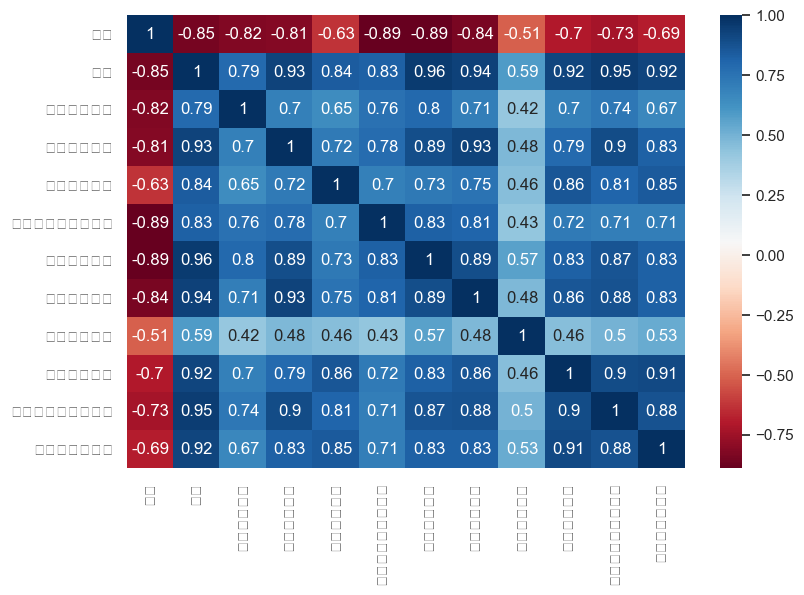

In [109]:
### 方法一 ###

df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

### 方法二 ###

# 借助 `matplotlib` 和 `seaborn` 

# 其中中文设置可以参考我的这篇文章 https://mp.weixin.qq.com/s/WKOGvQP-6QUAP00ZXjhweg

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (9,6),dpi=100)
sns.set(font='Songti SC')
sns.heatmap(df.corr().round(2),annot=True,cmap='RdBu')
plt.show()

### 15 - 统计信息｜频率

计算各省市出现的次数

In [110]:
df.省市.value_counts()

北京     18
江苏     15
上海     10
广东      9
湖北      7
陕西      7
浙江      4
湖南      3
山东      3
安徽      3
四川      3
河南      2
辽宁      2
福建      2
黑龙江     2
吉林      2
重庆      2
天津      2
云南      1
甘肃      1
江西      1
河北      1
Name: 省市, dtype: int64

微信搜索公众号「早起Python」，关注后可以获得更多资源！

### 16 - 统计信息｜热力地图

结合 `pyecharts` 将各省市高校上榜数量进行地图可视化

### 17 - 统计信息｜直方图

绘制总分的直方图、密度估计图

## 2 个 pandas EDA 插件

在 pandas 之外，还有两个插件可以快速实现 EDA

下面不作为习题，仅供介绍，感兴趣可以进一步搜索了解

执行全部代码即可获得 EDA 报告！

### 18 - pandas_profiling

<br>

如果没有提前安装 `pandas_profiling` 的话，需要提前 `pip` 进行安装

In [ ]:
! pip install pandas_profiling

In [105]:
import pandas_profiling

In [106]:
pandas_profiling.ProfileReport(df)

### 19 - sweetviz

如果没有提前安装 `sweetviz` 的话，需要提前 `pip` 进行安装

In [ ]:
! pip install sweetviz

In [ ]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html()

执行完上面的代码后，当前目录下会出现一个html文件，打开即可看到相关 EDA 报告

![](http://liuzaoqi.oss-cn-beijing.aliyuncs.com/2021/09/16/16317972442543.jpg?域名/sample.jpg?x-oss-process=style/stylename)